In [1]:
import pandas as pd
import numpy as np

### Linear model for classification

In regression, we saw that the target to be predicted was a continuous variable. In classification, this target will be discrete.
* Numerical variables에도 discrete이 있음을 명심하자!

In [2]:
penguins = pd.read_csv("data/penguins_classification.csv")

# only keep the Adelie and Chinstrap classes
penguins = penguins.set_index("Species").loc[
    ["Adelie", "Chinstrap"]].reset_index()
culmen_columns = ["Culmen Length (mm)", "Culmen Depth (mm)"]
target_column = "Species"

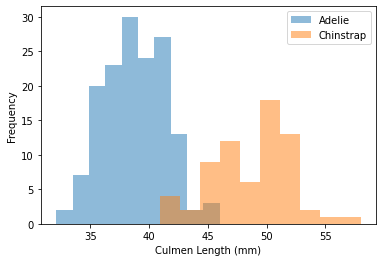

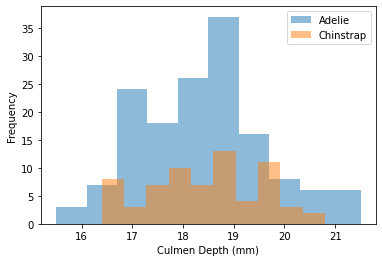

In [3]:
import matplotlib.pyplot as plt

for feature_name in culmen_columns:
    plt.figure()
    # plot the histogram for each specie
    penguins.groupby("Species")[feature_name].plot.hist(alpha=0.5, legend=True)
    plt.xlabel(feature_name)

In [4]:
from sklearn.model_selection import train_test_split

penguins_train, penguins_test = train_test_split(penguins, random_state=0)

data_train = penguins_train[culmen_columns]
data_test = penguins_test[culmen_columns]

target_train = penguins_train[target_column]
target_test = penguins_test[target_column]

In [5]:
import sklearn
sklearn.set_config(display="diagram")

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(), LogisticRegression(penalty='none'))
model.fit(data_train, target_train)
model.score(data_test, target_test)


1.0

<AxesSubplot:>

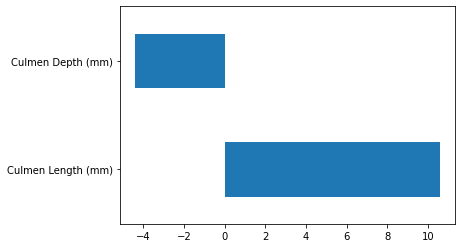

In [7]:
weight =pd.Series(model[-1].coef_[0], index=culmen_columns)
weight.plot.barh()


### Exercise

* In the previous notebook we set penalty="none" to disable regularization entirely. 
  
* This parameter can also control the type of regularization to use, whereas the regularization strength is set using the parameter C. 
* Settingpenalty="none" is equivalent to an infinitely large value of C. In this exercise, we ask you to train a logistic regression classifier using the penalty="l2" regularization (which happens to be the default in scikit-learn) to find by yourself the effect of the parameter C.

In [8]:
logistic_regression = make_pipeline(
    StandardScaler(), LogisticRegression(penalty="l2"))

In [9]:
Cs = [0.01, 0.1, 1, 10]
for c in Cs : 
    logistic_regression.set_params(logisticregression__C=c)
    logistic_regression.fit(data_train,target_train)
    acc = logistic_regression.score(data_test,target_test)
    print(acc)


0.6545454545454545
0.9454545454545454
1.0
1.0


In [10]:
x =[]
for c in Cs : 
    logistic_regression.set_params(logisticregression__C=c)
    logistic_regression.fit(data_train,target_train)
    x.append(logistic_regression[-1].coef_[0])

In [11]:
k = pd.DataFrame(x,columns=culmen_columns,index=Cs).T
culmen_columns
k

,0.01,0.10,1.00,10.00
Culmen Length (mm),0.467537,1.725882,3.724988,6.580371
Culmen Depth (mm),-0.002953,-0.286512,-1.096500,-2.491597


<AxesSubplot:>

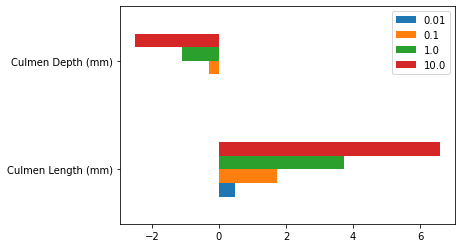

In [12]:
k.plot.barh()

<AxesSubplot:>

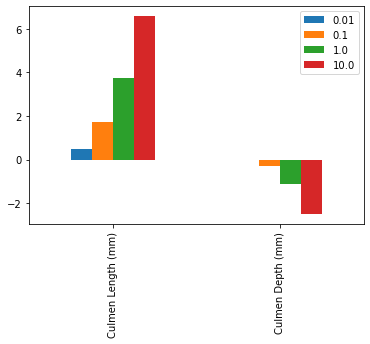

In [16]:
k.plot.bar()

### 참고하기
C가 작아질수록 weight이 0에 근접함.(Regularization이 강할수록 0에 가까워짐) 

Ridge 모델의 Alpha는 값이 커지면서 Regularization이 강해지지만, LogisticRegression의 C는 값이 작아지면서 Regularization이 강해진다.

In [13]:
k

,0.01,0.10,1.00,10.00
Culmen Length (mm),0.467537,1.725882,3.724988,6.580371
Culmen Depth (mm),-0.002953,-0.286512,-1.096500,-2.491597


In [14]:
b = pd.DataFrame([k.iloc[0].values,k.iloc[1].values,[0.01,0.10,1.00,10.00]]).T
b.columns=['leng','depth','cs']

In [15]:
b.iloc[0].to_list()

[0.4675371847893255, -0.0029527834145905182, 0.01]